In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from starter import kmeans
from starter import load_data
from starter import read_data
from starter import knn


minist_train = read_data("mnist_train.csv")
minist_test = read_data("mnist_test.csv")
minist_valid = read_data("mnist_valid.csv")




In [11]:
data = read_data("mnist_test.csv")

In [72]:
true_labels = []
for i in data:
    true_labels.append(int(i[0]))
np.unique(true_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:

predicted_labels = kmeans(minist_train, minist_valid, "euclidean", num_clusters=10, max_iterations=500)


In [76]:
predicted_labels_cosim = predicted_labels


In [78]:
predicted_labels
np.unique(predicted_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

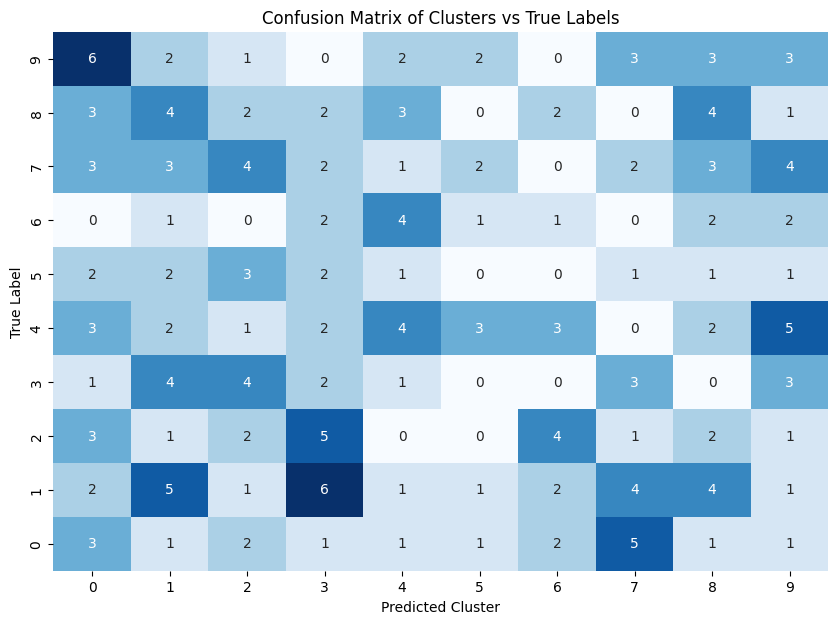

In [79]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define all possible labels (0 through 9 for MNIST)
all_labels = np.arange(10)

# Create DataFrame for confusion matrix with full label range for rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=all_labels, columns=all_labels).fillna(0)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Clusters vs True Labels")
plt.gca().invert_yaxis()  # Start y-axis from 0 at the bottom
plt.show()



In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming true_labels and predicted_labels are already defined as lists or arrays of the true labels and predictions.

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score (for multi-class classification, specify average='macro' or 'weighted')
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.1300
Precision: 0.1216
Recall: 0.1215
F1 Score: 0.1202
